In [ ]:
url = 'https://pl.wikipedia.org/wiki/Twierdzenie_Bayesa' ++zasoby

In [1]:
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

In [3]:
# load the iris datasets
iris = datasets.load_iris()

# Grab features (X) and the Target (Y)
X = iris.data

Y = iris.target

# Show the Built-in Data Description
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
# Fit a Naive Bayes model to the data
model = GaussianNB()

In [5]:
from sklearn.model_selection import train_test_split
# Split the data into Trainging and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [6]:
# Fit the training model
model.fit(X_train,Y_train)


GaussianNB(priors=None, var_smoothing=1e-09)

In [7]:
# Predicted outcomes
predicted = model.predict(X_test)

# Actual Expected Outvomes
expected = Y_test

In [8]:
print (metrics.accuracy_score(expected, predicted))

0.868421052631579


# Decision Trees and Random Forests

In [9]:
#Imports
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

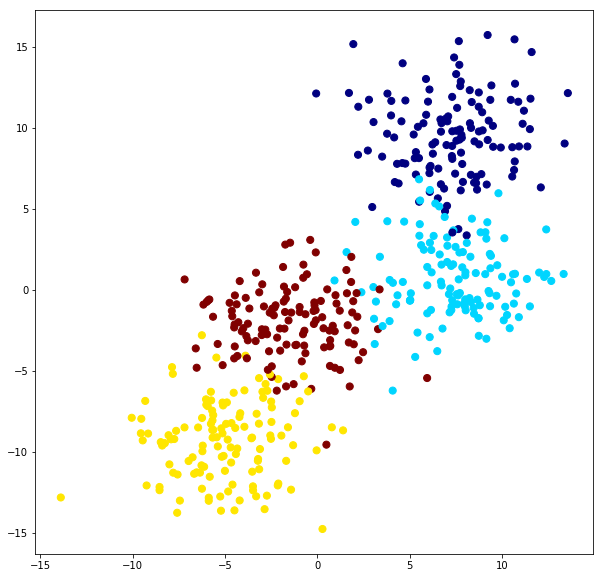

In [11]:
from sklearn.datasets import make_blobs #tworzenie fałszywych zestawów danych

X, y = make_blobs(n_samples=500, centers=4,
                  random_state=8, cluster_std=2.4)

#Scatter plot the points
plt.figure(figsize=(10,10))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

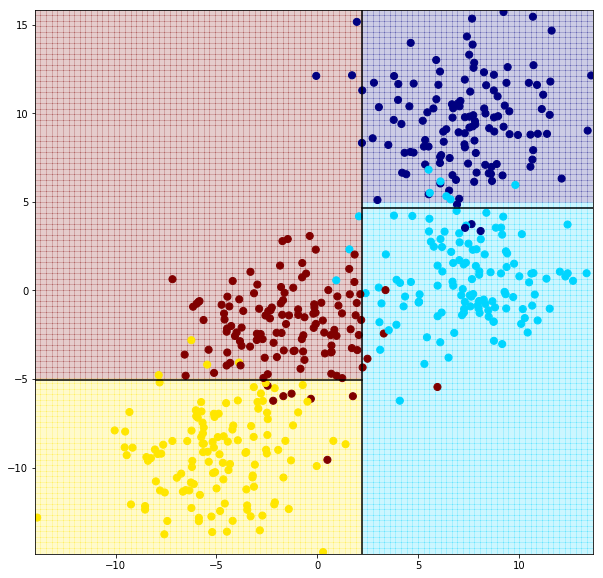

In [14]:
# Set model variable
clf = DecisionTreeClassifier(max_depth=2,random_state=0)

# Show Boundaries
visualize_tree(clf,X,y)

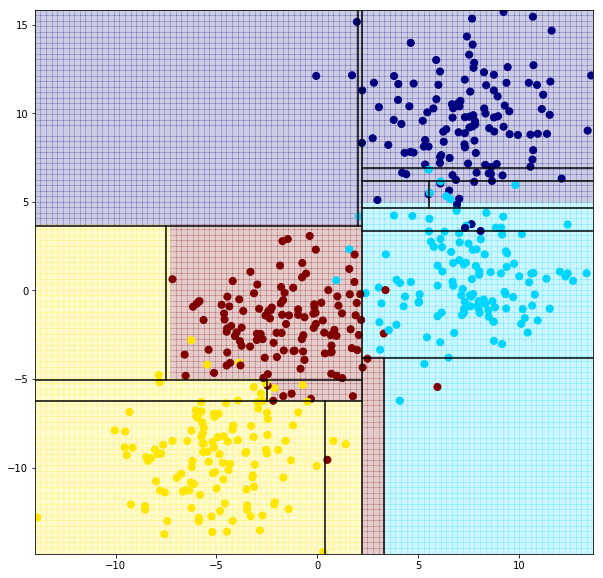

In [15]:
# Set model variable
clf = DecisionTreeClassifier(max_depth=4,random_state=0)

# Show Boundaries
visualize_tree(clf,X,y)

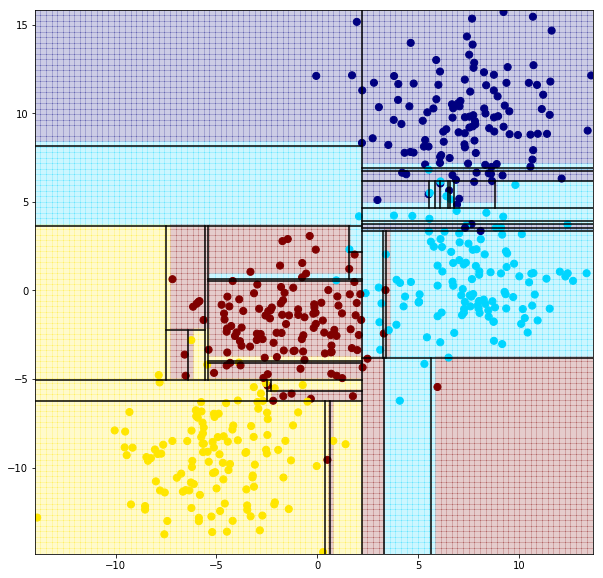

In [16]:
# Set model variable
clf = DecisionTreeClassifier(max_depth=12,random_state=0)

# Show Boundaries
visualize_tree(clf,X,y)

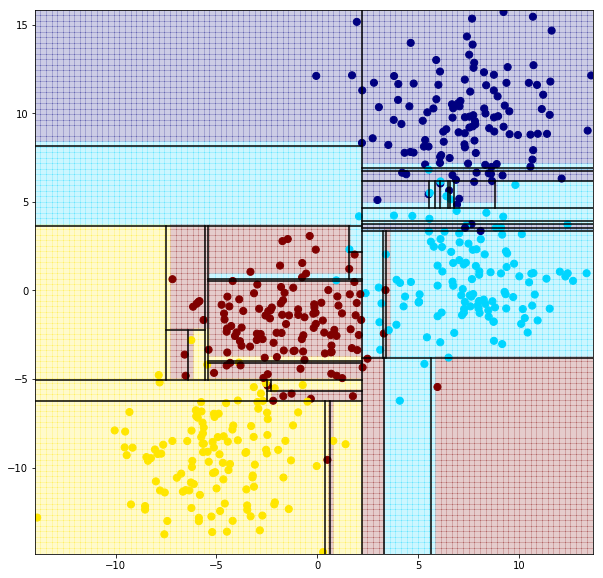

In [17]:
# Set model variable
clf = DecisionTreeClassifier(max_depth=200,random_state=0)

# Show Boundaries
visualize_tree(clf,X,y)

In [ ]:
#nad-dopisywanie

In [19]:
from sklearn.ensemble import RandomForestCalssifier

clf = RandomForestClassifier(n_estimators=100, random_state=0)

visualize_tree(clf,X,y,boundaries=False)

ImportError: cannot import name 'RandomForestCalssifier' from 'sklearn.ensemble' (C:\Users\aleks\Anaconda3\lib\site-packages\sklearn\ensemble\__init__.py)

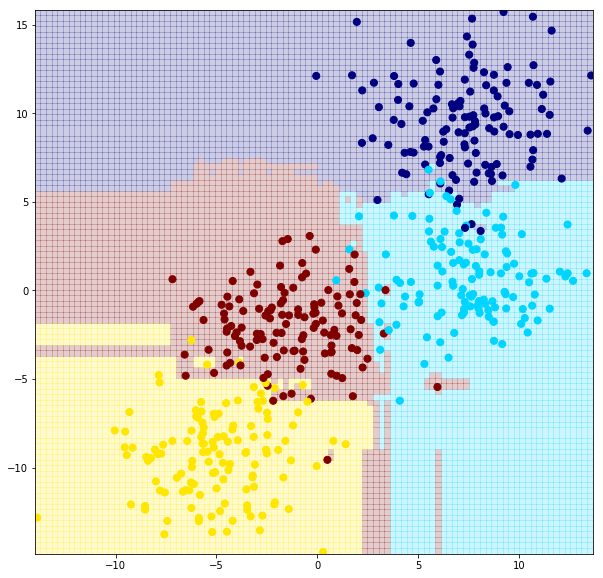

In [20]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators
clf = RandomForestClassifier(n_estimators=100,random_state=0)

# Get rid of boundaries to avoid error
visualize_tree(clf,X,y,boundaries=False)

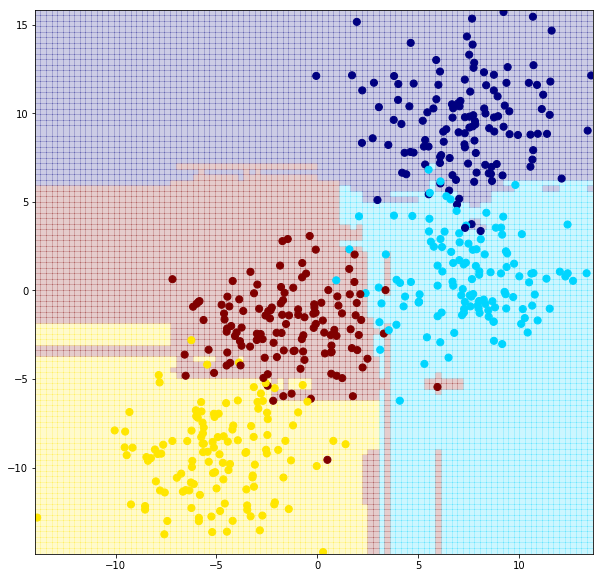

In [21]:
from sklearn.ensemble import RandomForestClassifier

# n_estimators
clf = RandomForestClassifier(n_estimators=500,random_state=0)

# Get rid of boundaries to avoid error
visualize_tree(clf,X,y,boundaries=False)

<ErrorbarContainer object of 3 artists>

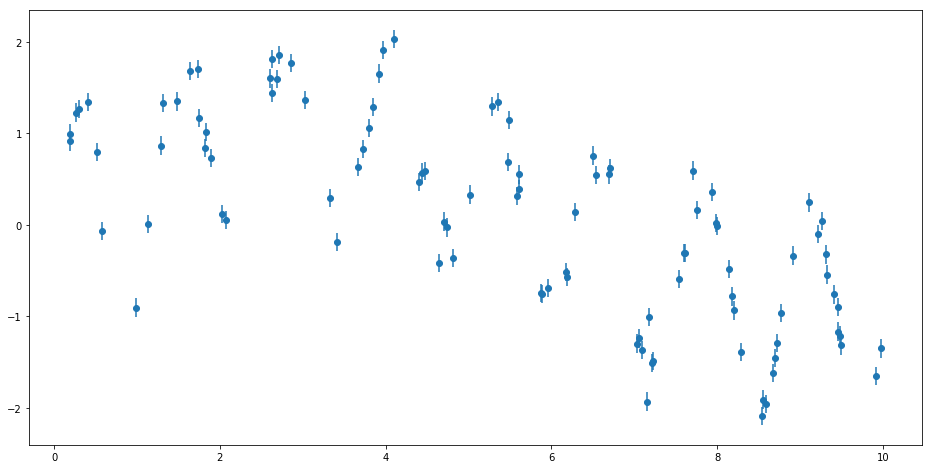

In [22]:
from sklearn.ensemble import RandomForestRegressor

x = 10 * np.random.rand(100)

def sin_model(x, sigma=0.2 # szum):
    '''
    Generate random sinusoidal data for regression analysis. Does SciKit-Learn have this?
    '''
   
    noise = sigma * np.random.randn(len(x))

    return np.sin(5 * x) + np.sin(0.5 * x) + noise

# Call y for data with x
y = sin_model(x)

# Plot x vs y
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

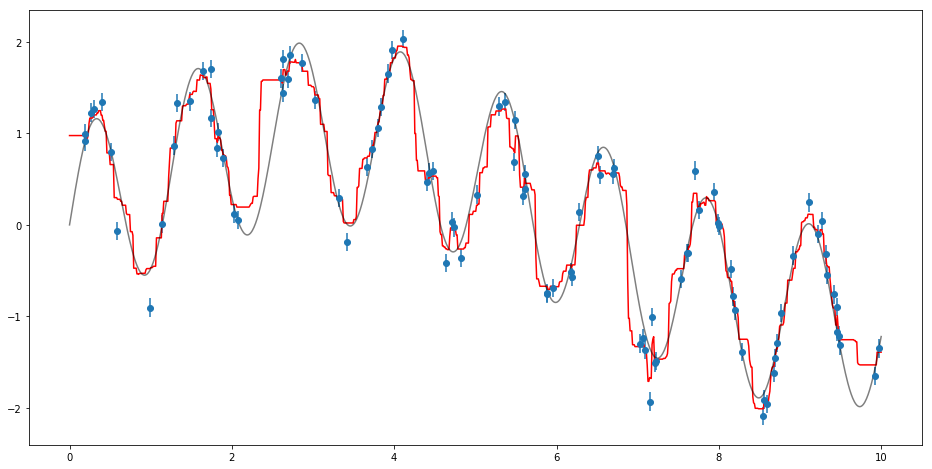

In [28]:
# X points
xfit = np.linspace(0, 10, 1000)

# Model
rfr = RandomForestRegressor(100)

# Fit Model (Format array for y with [:,None])
rfr.fit(x[:, None], y)

# Set predicted points
yfit = rfr.predict(xfit[:, None])

# Set real poitns (the model function)
ytrue = sin_model(xfit, 0)

# Plot 
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

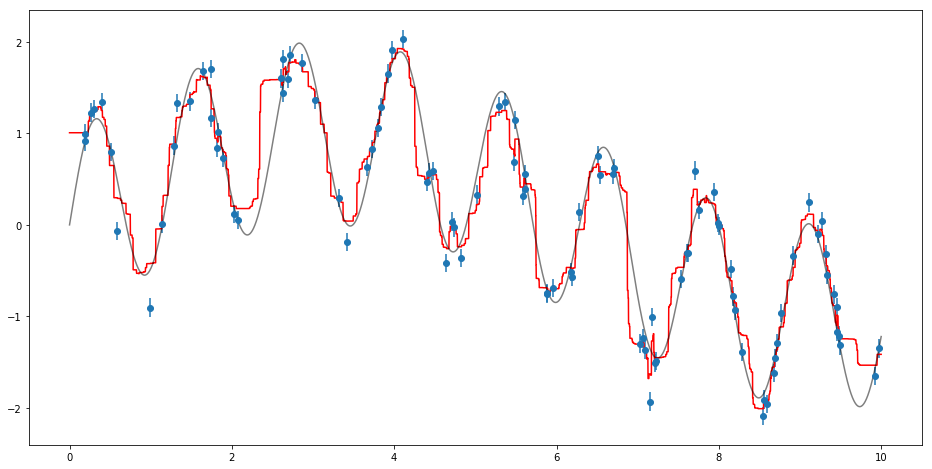

In [29]:
# X points
xfit = np.linspace(0, 10, 10000)

# Model
rfr = RandomForestRegressor(1000)

# Fit Model (Format array for y with [:,None])
rfr.fit(x[:, None], y)

# Set predicted points
yfit = rfr.predict(xfit[:, None])

# Set real poitns (the model function)
ytrue = sin_model(xfit, 0)

# Plot 
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

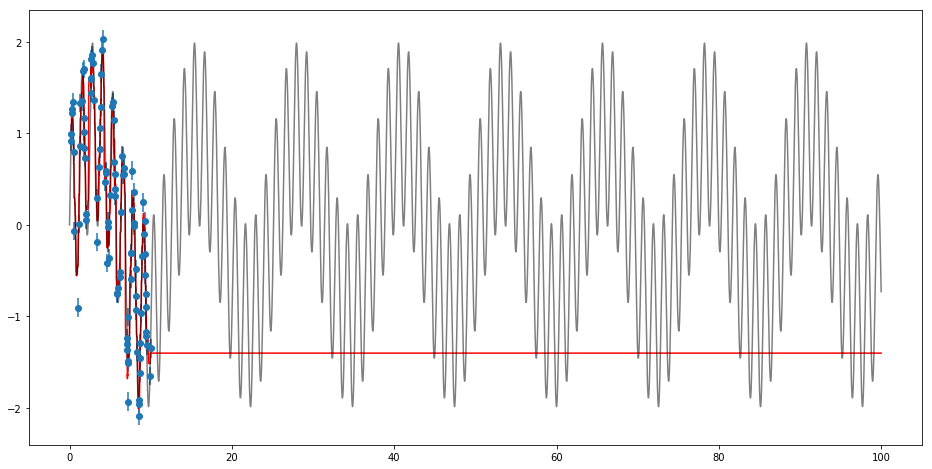

In [30]:
# X points
xfit = np.linspace(0, 100, 10000)

# Model
rfr = RandomForestRegressor(1000)

# Fit Model (Format array for y with [:,None])
rfr.fit(x[:, None], y)

# Set predicted points
yfit = rfr.predict(xfit[:, None])

# Set real poitns (the model function)
ytrue = sin_model(xfit, 0)

# Plot 
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

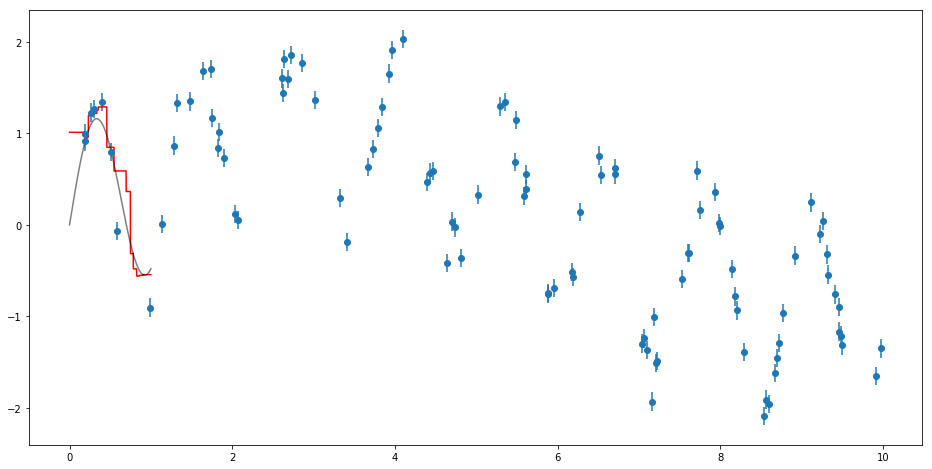

In [31]:
# X points
xfit = np.linspace(0, 1, 1000)

# Model
rfr = RandomForestRegressor(10)

# Fit Model (Format array for y with [:,None])
rfr.fit(x[:, None], y)

# Set predicted points
yfit = rfr.predict(xfit[:, None])

# Set real poitns (the model function)
ytrue = sin_model(xfit, 0)

# Plot 
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);